### **DATA ANALYSIS PYTHON PROJECT- BLINKIT ANALYSIS**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import raw data

In [44]:
df = pd.read_csv("blinkit_data.csv")
print(df.head(20))

   Item Fat Content Item Identifier              Item Type  \
0           Regular           FDX32  Fruits and Vegetables   
1           Low Fat           NCB42     Health and Hygiene   
2           Regular           FDR28           Frozen Foods   
3           Regular           FDL50                 Canned   
4           Low Fat           DRI25            Soft Drinks   
5           low fat           FDS52           Frozen Foods   
6           Low Fat           NCU05     Health and Hygiene   
7           Low Fat           NCD30              Household   
8           Low Fat           FDW20  Fruits and Vegetables   
9           Low Fat           FDX25                 Canned   
10               LF           FDX21            Snack Foods   
11          Low Fat           NCU41     Health and Hygiene   
12          Low Fat           FDL20  Fruits and Vegetables   
13          Low Fat           NCR54              Household   
14          Low Fat           FDH19                   Meat   
15      

Size of data

In [ ]:
print(df.shape)

Getting column names

In [ ]:
print("Column names:\n",df.columns)

Get all datatypes

In [ ]:
print(df.dtypes)
print(df.info())

Data cleaning: STEP-1 Check for all unqiue values in a particular column

In [ ]:
#STEP-1:Get unqiue values in a particular column
print(df['Item Fat Content'].unique())


Data cleaning: STEP-2 Replacing faulty values

In [50]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Business Requirements

Basic information

In [ ]:
total_sales = df['Sales'].sum()
print('Sum of all the sales:',total_sales)

avg_sales = df['Sales'].mean()
print('Average sales:',avg_sales)

number_of_items_sold = df['Sales'].count()
print('Total number of item sold',number_of_items_sold)

avg_ratings = df['Rating'].mean()
print('Average ratings: ',avg_ratings)


KPI 1:Total Sales by FAT Content

In [ ]:
# total_sales_regular = df[df['Item Fat Content']=='Regular']
# print("Regular:",total_sales_regular['Sales'].sum())

# total_sales_lf = df[df['Item Fat Content']=='Low Fat']
# print("Low Fat:",total_sales_lf['Sales'].sum())
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels =sales_by_fat.index,autopct='%.1f',startangle=90)
plt.title("Sales by Fat Content")
#for circle
plt.axis('equal')
plt.show()

KPI 2:Total Sales by Item Type

In [ ]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
# 10 inches wide and 6 inches tall
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_item_type.index,sales_by_item_type.values)

plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(
        bar.get_x()  #gets the starting x-position of the bar
          + bar.get_width()/2, #centers the label horizontally
        bar.get_height(), # Y-position: places the label right at the top
        f'{bar.get_height():,.0f}', # Label text: value of the bar (no decimals, comma-separated)
        ha='center',# Horizontal alignment: center
        va='bottom',# Vertical alignment: text is just above the bar
        fontsize=8 # Font size of the label
        )

plt.tight_layout()
#for circle
plt.show()

KPI 3:FAT content by outlet for total sales.

In [ ]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
# plt.title('Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

KPI 4:Total Sales by Outlet Establishment

In [ ]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

KPI 5:Sales by Outlet Size

In [ ]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index, autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

KPI 6:Sales by Outlet Location

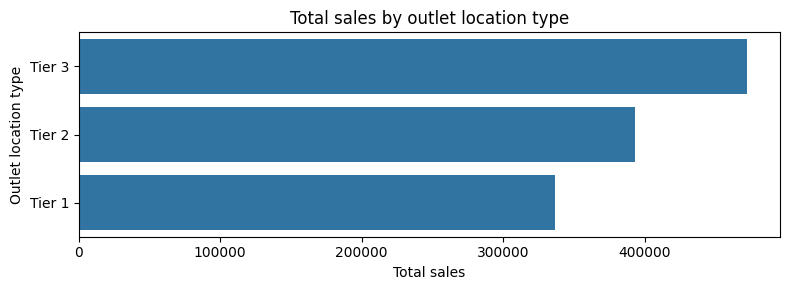

In [85]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)
plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales',y='Outlet Location Type',data= sales_by_location)

plt.title('Total sales by outlet location type')
plt.xlabel('Total sales')
plt.ylabel('Outlet location type')

plt.tight_layout()
plt.show()